# First part: Comparison of classifiers on simulated data

In [31]:
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

The following are two useful functions for plotting a dataset (only training, or all data split into training and test) and the decision boundary of a model and the data

In [32]:
def plot_dataset(X_train, y_train, X_test=None, y_test=None):
    # -- function that plots the datapoints
    h = 0.02 # -- h is the step length
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # -- just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1,1,1)
    ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    
    if X_test is not None and y_test is not None:
        # -- Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2, edgecolors="k")
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

In [33]:
def plot_model(input_model, X_train, y_train, X_test, y_test):
    # -- function that plots the datapoints and decision boundaries of input_model
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # -- just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1, 1, 1)
    
    ax.set_title("Model decision boundary")
    # -- Plot the decision boundary. For that, we will assign a color to each
    # -- point in the mesh [x_min, x_max] x [y_min, y_max].
    if hasattr(input_model, "decision_function"):
        Z = input_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = input_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # -- Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha = 0.8)

    # -- Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")
    # -- Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, edgecolors = "k", alpha = 0.2)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

Let's generate an almost linearly separable dataset and run the perceptron first, than SVM, then a NN with default parameters

In [34]:
# -- generate a random n-classification dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

# -- add noise to points exploiting a uniform distribution
# -- the aim is to get closer to a non-linearly separable dataset 
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size = X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training dataset.

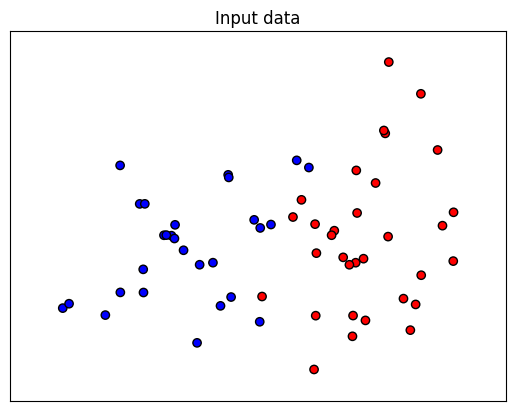

In [35]:
plot_dataset(X_train_scaled, y_train)

Let's now print all data (i.e., train and and test). The points in the test set are the most transparent that will be displayed.

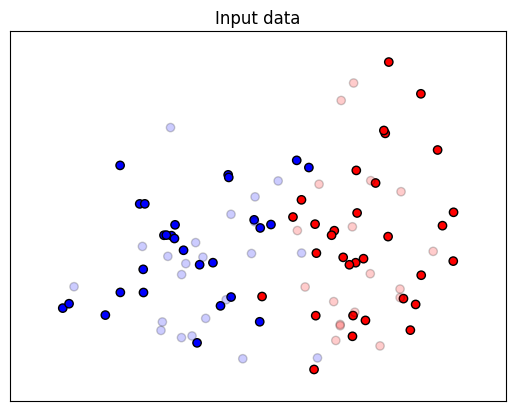

In [36]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Now let's learn a perceptron, plot its decision boundary, and print the train error and the test error.

Training error:, 0.03333
Test error:, 0.05000


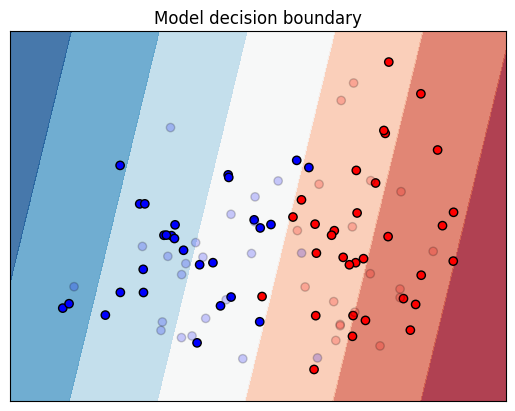

In [37]:
perceptron = Perceptron(random_state = 11)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error:, {(1.0 - perceptron.score(X_train_scaled, y_train)):.5f}')

print(f'Test error:, {(1.0 - perceptron.score(X_test_scaled, y_test)):.5f}')

Let's do the same for SVM.

Training error: 0.05000
Test error: 0.05000


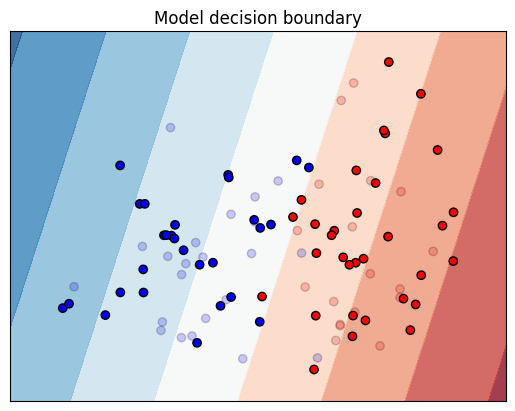

In [38]:
svm = SVC(kernel = "linear", C = 1)
svm.fit(X_train_scaled, y_train)    

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - svm.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - svm.score(X_test_scaled, y_test)):.5f}')

Let's try with a NN.

Training error: 0.01667
Test error: 0.05000


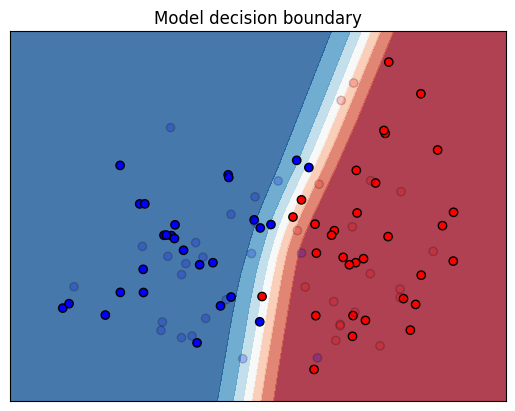

In [39]:
# -- one hidden layer with size= 100, activation function = ReLU (see documentation)
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - mlp.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - mlp.score(X_test_scaled, y_test)):.5f}')

---

Let's try now with some more complex dataset.

In [40]:
X, y = make_moons(noise = 0.3, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training data.

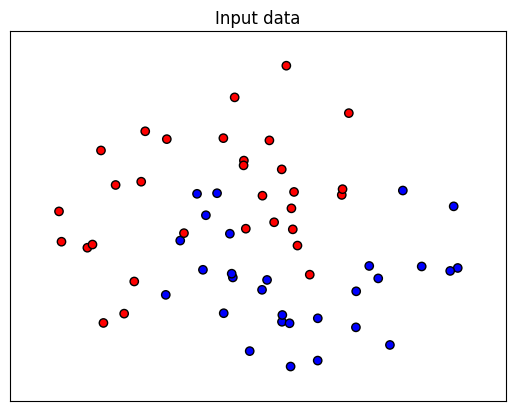

In [41]:
plot_dataset(X_train_scaled, y_train)

Let's plot all the data.

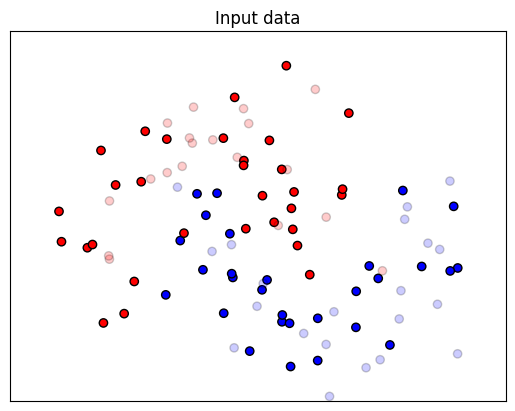

In [42]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Let's run the perceptron.

Training error: 0.21667
Test error: 0.22500


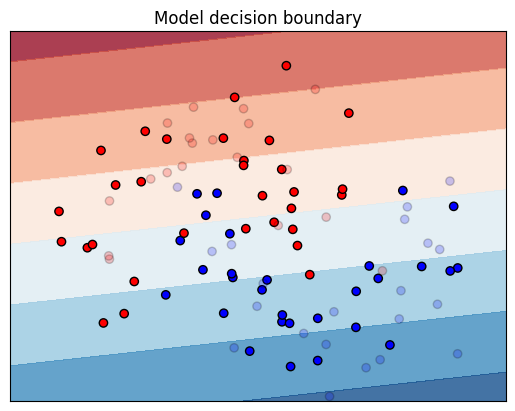

In [43]:
perceptron = Perceptron(random_state = 11)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - perceptron.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - perceptron.score(X_test_scaled, y_test)):.5f}')

Let's run the SVM

Training error: 0.18333
Test error: 0.10000


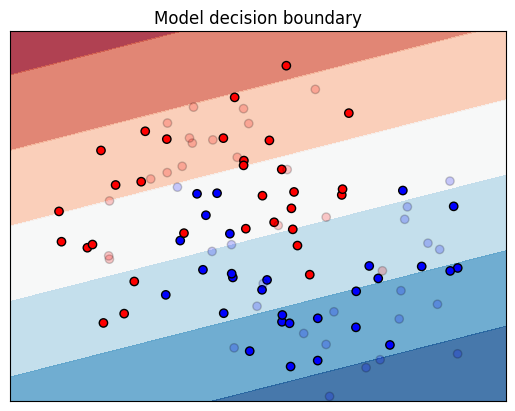

In [44]:
svm = SVC(kernel = "linear")
svm.fit(X_train, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - svm.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - svm.score(X_test_scaled, y_test)):.5f}')

Let's try the NN

Training error: 0.01667
Test error: 0.05000


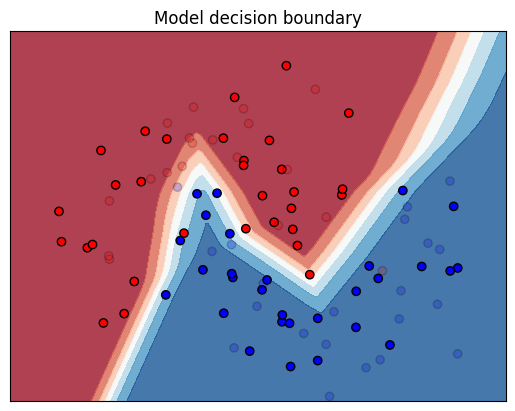

In [45]:
mlp = MLPClassifier(max_iter = 1500)
# -- Note that with max_iter = 1000 the model is not converging. (see 'tol' parameter). Try to re-train with max_iter = 1500
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - mlp.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - mlp.score(X_test_scaled, y_test)):.5f}')

---

Another interesting dataset

In [46]:
X, y = make_circles(noise = 0.2, factor = 0.5, random_state = 1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training data.

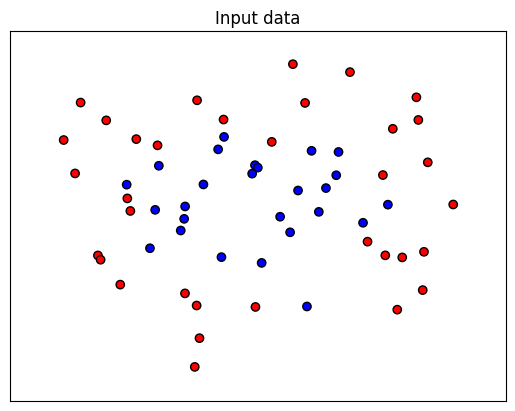

In [47]:
plot_dataset(X_train_scaled, y_train)

Let's plot all the data.

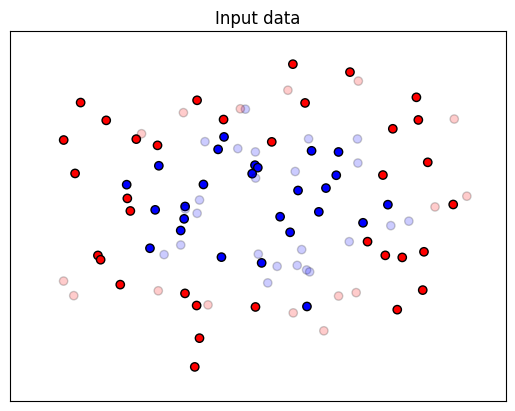

In [48]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Let's run the perceptron

Training error: 0.50000
Test error: 0.47500


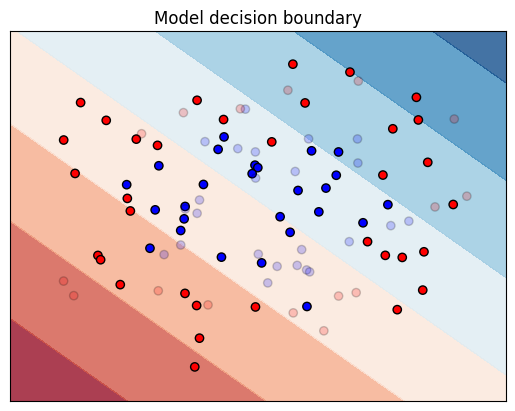

In [49]:
perceptron = Perceptron(random_state = 11)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - perceptron.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - perceptron.score(X_test_scaled, y_test)):.5f}')

Let's run the SVM

Training error: 0.43333
Test error: 0.60000


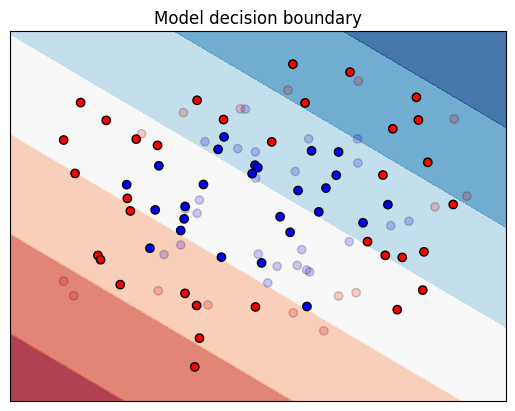

In [50]:
svm = SVC(kernel = "linear")
svm.fit(X_train, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - svm.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - svm.score(X_test_scaled, y_test)):.5f}')

Let's run the NN

Training error: 0.03333
Test error: 0.12500


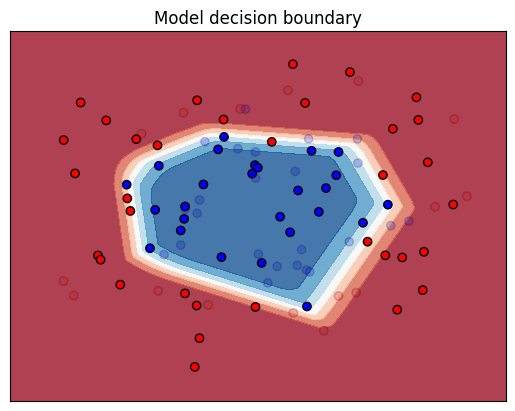

In [51]:
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - mlp.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - mlp.score(X_test_scaled, y_test)):.5f}')

---

Let's now consider the blobs dataset considered in the last Lab.

In [52]:
# -- make_blobs dataset

# -- generate the dataset
X, y = make_blobs(n_samples = 1000, centers = 2, n_features = 2, center_box=(-7.5, 7.5), random_state = 37, cluster_std = 2.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# -- scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot all the data.

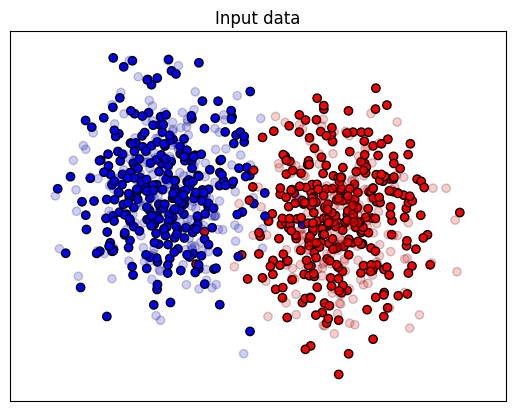

In [53]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Training error: 0.02833
Test error: 0.03750


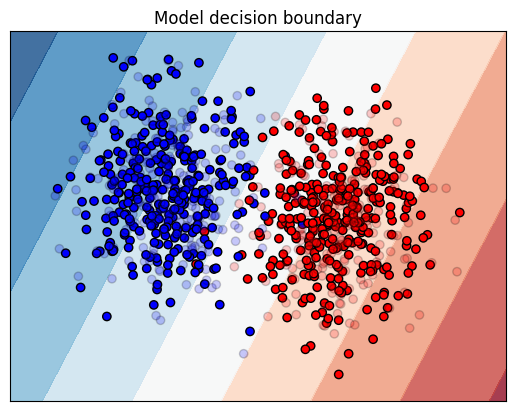

In [54]:
# -- perceptron
perceptron = Perceptron(random_state = 11)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - perceptron.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - perceptron.score(X_test_scaled, y_test)):.5f}')

Training error: 0.31667
Test error: 0.28500


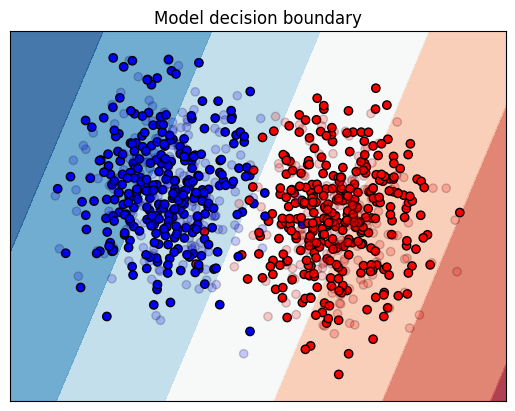

In [55]:
# -- svm
svm = SVC(kernel = "linear")
svm.fit(X_train, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - svm.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - svm.score(X_test_scaled, y_test)):.5f}')

Training error: 0.02000
Test error: 0.01500


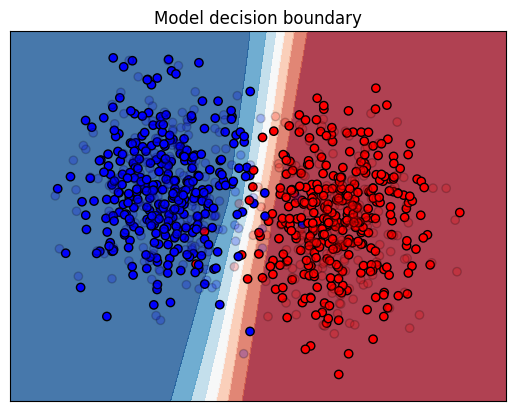

In [56]:
# -- NN (mlp)
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Training error: {(1.0 - mlp.score(X_train_scaled, y_train)):.5f}')
print(f'Test error: {(1.0 - mlp.score(X_test_scaled, y_test)):.5f}')

# Second part: Regression on House Pricing Dataset
We consider a reduced version of a dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

https://www.kaggle.com/harlfoxem/housesalesprediction

For each house we know 18 house features (e.g., number of bedrooms, number of bathrooms, etc.) plus its price, that is what we would like to predict.

In [57]:
# -- put here your ID_Number  (numero di matricola)
numero_di_matricola = 1 

In [58]:
#import all packages needed
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -- avoid convergence warnings from sklearn library
import warnings
warnings.filterwarnings("ignore")

Load the data, remove data samples/points with missing values (NaN) and take a look at them.

In [59]:
# -- load the dataset
df = pd.read_csv('kc_house_data.csv', sep = ',')
# -- remove the data samples with missing values (NaN)
df = df.dropna() 

# -- see features_explained.pdf (if you want)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.164000e+03,3.164000e+03,3164.000000,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,4.645240e+09,5.354358e+05,3.381163,2.071903,2070.027813,1.525054e+04,1.434893,0.009798,0.244311,3.459229,7.615676,1761.252212,308.775601,1967.489254,94.668774,98077.125158,47.557868,-122.212337,1982.544564,13176.302465
std,2.854203e+09,3.809004e+05,0.895472,0.768212,920.251879,4.254457e+04,0.507792,0.098513,0.776298,0.682592,1.166324,815.934864,458.977904,28.095275,424.439427,54.172937,0.140789,0.139577,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.199775e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.453750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459575,-122.324250,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1969.000000,0.000000,98059.000000,47.572500,-122.226000,1830.000000,7873.000000
75%,7.358175e+09,6.402500e+05,4.000000,2.500000,2500.000000,1.122250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680250,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


Extract input and output data. We want to predict the price by using features other than id as input.

In [60]:
Data = df.values
# -- m = number of input samples
m = Data.shape[0]
print("Amount of data:",m)
Y = Data[:m, 2]
X = Data[:m, 3:]

Amount of data: 3164


## Data Pre-Processing

We split the data into 3 parts: one will be used for training and choosing the parameters, one for choosing among different models, and one for testing. The part for training and choosing the parameters will consist of $2/3$ of all samples, the one for choosing among different models will consist of $1/6$ of all samples, while the other part consists of the remaining $1/6$-th of all samples.

In [61]:
# -- Split data into train (2/3 of samples), validation (1/6 of samples), and test data (the rest)
m_train = int(2./3.*m)
m_val = int((m-m_train)/2.)
m_test = m - m_train - m_val
print("Amount of data for training and deciding parameters:", m_train)
print("Amount of data for validation (choosing among different models):", m_val)
print("Amount of data for test:", m_test)

from sklearn.model_selection import train_test_split

X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X, Y, test_size = m_test/m, random_state = numero_di_matricola)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, 
                                                  test_size = m_val/(m_train + m_val), random_state = numero_di_matricola)

Amount of data for training and deciding parameters: 2109
Amount of data for validation (choosing among different models): 527
Amount of data for test: 528


Let's standardize the data.

In [62]:
# -- Data pre-processing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train_and_val_scaled = scaler.transform(X_train_and_val)

## Neural Networks
Let's start by learning a simple neural network with 1 hidden node.
Note: we are going to use the input parameter solver='lbfgs' and random_state=numero_di_matricola to fix the random seed (so results are reproducible).

We hereby define a function to train an MLPRegressor on the (already scaled) training data and (optionally) print its parameters at the end of the training.

In [63]:
# -- look at kwargs** in Python

In [64]:
from sklearn.neural_network import MLPRegressor

def train_model(X_train, Y_train, X_val, Y_val, print_weights = True, **params):

    mlp_model = MLPRegressor(**params)
    mlp_model.fit(X_train, Y_train)

    # -- let's print the error (1 - R^2) on training data
    print(f'Training error: {(1.0 - mlp_model.score(X_train, Y_train)):.5f}')
    # -- let's print the error (1 - R^2) on validation data
    print(f'Validation error: {(1.0 - mlp_model.score(X_val, Y_val)):.5f}')

    if print_weights:

        weights = mlp_model.coefs_
        biases = mlp_model.intercepts_
    
        # -- let's print the coefficients of the model for the input nodes (but not the bias)
        print('\n--- Weights of NN ---')
    
        for i_layer, (w, b) in enumerate(zip(weights, biases)):
            print(f'\n# Layer {i_layer+1}')
            print(f'--- Weights, with shape {w.shape} ---')
            for i in range(w.shape[0]):
                for j in range(w.shape[1]):
                    print(f'w_({i+1}, {j+1})^({i_layer+1}): {w[i][j]:.3f}')
                    
            print(f'--- Biases, with shape {b.shape} ---')
            for i in range(b.shape[0]):
                print(f'b_{i+1}: {b[i]:.3f}')

In [65]:
# -- let's define the model
# -- Look how to hidden_layer_sizes in the documentation
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.26395
Validation error: 0.30405

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): -215.110
w_(2, 1)^(1): 269.730
w_(3, 1)^(1): 525.040
w_(4, 1)^(1): -60.763
w_(5, 1)^(1): 4.110
w_(6, 1)^(1): 712.195
w_(7, 1)^(1): 295.338
w_(8, 1)^(1): 136.901
w_(9, 1)^(1): 817.288
w_(10, 1)^(1): 494.474
w_(11, 1)^(1): 163.819
w_(12, 1)^(1): -583.071
w_(13, 1)^(1): 38.050
w_(14, 1)^(1): -203.767
w_(15, 1)^(1): 601.422
w_(16, 1)^(1): -142.111
w_(17, 1)^(1): 146.986
w_(18, 1)^(1): -27.047
--- Biases, with shape (1,) ---
b_1: 3802.045

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): 140.849
--- Biases, with shape (1,) ---
b_1: -50.333


## Neural Networks vs Linear Models

Let's learn a linear model on the same data and compare the results with the simple NN above.

In [66]:
from sklearn import linear_model

LR = linear_model.LinearRegression()

LR.fit(X_train_scaled, Y_train)

# -- let's print the error (1 - R^2) on training data
print(f'Training error: {(1.0 - LR.score(X_train_scaled, Y_train)):.5f}')
# -- let's print the error (1 - R^2) on validation data
print(f'Validation error: {(1.0 - LR.score(X_val_scaled, Y_val)):.5f}')

print(f'\n--- Weights, with shape {LR.coef_.shape} ---\n{LR.coef_}')
print(f'\n--- Bias --- \n{LR.intercept_}')

Training error: 0.26536
Validation error: 0.31154

--- Weights, with shape (18,) ---
[-31303.71909155  35848.45081517  74506.78099995  -8012.41104949
    671.23713588 100205.53195594  41671.19028923  19507.84532115
 111331.50566184  69959.22677526  23468.73219785 -78236.93092911
   6535.34729956 -28197.21476235  83701.76486765 -21647.26671149
  22056.22833416  -2002.69401407]

--- Bias --- 
536831.9203413766


Is there a way to make a NN network learn a linear model?

Let's first check what is the activation function used by MLPRegressor...

In [67]:
# -- let's write the code to learn a linear model with NN: how? 
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity'
         }
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): 51.551
w_(2, 1)^(1): -59.028
w_(3, 1)^(1): -122.969
w_(4, 1)^(1): 13.195
w_(5, 1)^(1): -1.107
w_(6, 1)^(1): -165.017
w_(7, 1)^(1): -68.625
w_(8, 1)^(1): -32.126
w_(9, 1)^(1): -183.340
w_(10, 1)^(1): -114.966
w_(11, 1)^(1): -38.516
w_(12, 1)^(1): 128.839
w_(13, 1)^(1): -10.762
w_(14, 1)^(1): 46.437
w_(15, 1)^(1): -137.839
w_(16, 1)^(1): 35.648
w_(17, 1)^(1): -36.322
w_(18, 1)^(1): 3.297
--- Biases, with shape (1,) ---
b_1: -883.447

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -607.243
--- Biases, with shape (1,) ---
b_1: 365.292


In [68]:
# -- Example of handmade computations: with null input vector:
# -- linear model output = bias ~ 536.831,9203
# -- NN: w_(1, 1)^(2) * b_1 + b_2 ~ 536.829,396
# -- why the above tiny difference? Because of l2 default regularization

Note that there is an $\ell_2$ regularization term in MLPRegressor. What about making it smaller?

In [69]:
# -- you can try to change alpha (e.g., huge value to see the model is forcing null vector w)
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 1e-20
         }
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): 51.551
w_(2, 1)^(1): -59.028
w_(3, 1)^(1): -122.969
w_(4, 1)^(1): 13.195
w_(5, 1)^(1): -1.107
w_(6, 1)^(1): -165.017
w_(7, 1)^(1): -68.625
w_(8, 1)^(1): -32.126
w_(9, 1)^(1): -183.340
w_(10, 1)^(1): -114.966
w_(11, 1)^(1): -38.516
w_(12, 1)^(1): 128.839
w_(13, 1)^(1): -10.762
w_(14, 1)^(1): 46.437
w_(15, 1)^(1): -137.839
w_(16, 1)^(1): 35.648
w_(17, 1)^(1): -36.322
w_(18, 1)^(1): 3.297
--- Biases, with shape (1,) ---
b_1: -883.447

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -607.243
--- Biases, with shape (1,) ---
b_1: 365.292


In [70]:
# -- with alpha = 1e-20: w_(1, 1)^(2) * b_1 + b_2 is 536.832,298621 (the difference is even closer, 
# -- not perfectly the same due to rounding)

## More Complex NNs

Let's try more complex NN, for example increasing the number of nodes in the only hidden layer, or increasing the number of hidden layers.

Let's build a NN with 2 nodes in the only hidden layer

In [71]:
# -- let's build a NN with 2 nodes in the only hidden layer
params = {'hidden_layer_sizes': (2, ), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.18062
Validation error: 0.20719

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 2) ---
w_(1, 1)^(1): 90.901
w_(1, 2)^(1): -33.268
w_(2, 1)^(1): 120.440
w_(2, 2)^(1): 39.281
w_(3, 1)^(1): 85.730
w_(3, 2)^(1): 73.030
w_(4, 1)^(1): -261.150
w_(4, 2)^(1): 28.262
w_(5, 1)^(1): -30.646
w_(5, 2)^(1): 17.935
w_(6, 1)^(1): 198.056
w_(6, 2)^(1): 25.610
w_(7, 1)^(1): 34.860
w_(7, 2)^(1): 37.561
w_(8, 1)^(1): 96.969
w_(8, 2)^(1): 25.700
w_(9, 1)^(1): 312.526
w_(9, 2)^(1): 132.868
w_(10, 1)^(1): 84.989
w_(10, 2)^(1): 68.810
w_(11, 1)^(1): 19.246
w_(11, 2)^(1): 23.387
w_(12, 1)^(1): -217.443
w_(12, 2)^(1): -81.181
w_(13, 1)^(1): -3.490
w_(13, 2)^(1): 20.120
w_(14, 1)^(1): -301.256
w_(14, 2)^(1): -26.372
w_(15, 1)^(1): 305.597
w_(15, 2)^(1): 144.601
w_(16, 1)^(1): -463.805
w_(16, 2)^(1): -16.390
w_(17, 1)^(1): 194.561
w_(17, 2)^(1): 52.897
w_(18, 1)^(1): -251.048
w_(18, 2)^(1): -11.123
--- Biases, with shape (2,) ---
b_1: -1049.732
b_2: 897.623

# Layer 2
--- Weights,

Let's build a NN with 5 nodes in the only hidden layer

In [72]:
# -- let's build a NN with 5 nodes in the only hidden layer
params = {'hidden_layer_sizes': (5, ), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.16287
Validation error: 0.21551

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 5) ---
w_(1, 1)^(1): -184.528
w_(1, 2)^(1): 158.315
w_(1, 3)^(1): 75.866
w_(1, 4)^(1): 169.063
w_(1, 5)^(1): -43.327
w_(2, 1)^(1): 310.629
w_(2, 2)^(1): 412.305
w_(2, 3)^(1): 203.489
w_(2, 4)^(1): 126.377
w_(2, 5)^(1): -3.589
w_(3, 1)^(1): -408.213
w_(3, 2)^(1): 356.451
w_(3, 3)^(1): 257.749
w_(3, 4)^(1): -314.563
w_(3, 5)^(1): 309.635
w_(4, 1)^(1): -162.427
w_(4, 2)^(1): -23.375
w_(4, 3)^(1): -771.892
w_(4, 4)^(1): 110.134
w_(4, 5)^(1): 74.657
w_(5, 1)^(1): 891.471
w_(5, 2)^(1): -968.669
w_(5, 3)^(1): 220.311
w_(5, 4)^(1): -47.583
w_(5, 5)^(1): -111.115
w_(6, 1)^(1): -397.560
w_(6, 2)^(1): 738.355
w_(6, 3)^(1): 551.570
w_(6, 4)^(1): -527.681
w_(6, 5)^(1): -90.704
w_(7, 1)^(1): -597.342
w_(7, 2)^(1): 699.039
w_(7, 3)^(1): -26.171
w_(7, 4)^(1): -475.489
w_(7, 5)^(1): 209.815
w_(8, 1)^(1): 105.961
w_(8, 2)^(1): 823.123
w_(8, 3)^(1): 218.603
w_(8, 4)^(1): -29.177
w_(8, 5)^(1): 

Let's build a NN with 10 nodes in the only hidden layer

In [73]:
# -- let's build a NN with 10 nodes in the only hidden layer
params = {'hidden_layer_sizes': (10, ), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.12023
Validation error: 0.31252

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 10) ---
w_(1, 1)^(1): 135.345
w_(1, 2)^(1): -20.668
w_(1, 3)^(1): -86.443
w_(1, 4)^(1): 87.988
w_(1, 5)^(1): 84.858
w_(1, 6)^(1): -53.709
w_(1, 7)^(1): 33.628
w_(1, 8)^(1): -14.155
w_(1, 9)^(1): -61.930
w_(1, 10)^(1): 193.879
w_(2, 1)^(1): -0.288
w_(2, 2)^(1): -62.190
w_(2, 3)^(1): 117.559
w_(2, 4)^(1): 74.323
w_(2, 5)^(1): -80.791
w_(2, 6)^(1): 429.000
w_(2, 7)^(1): 317.571
w_(2, 8)^(1): -33.893
w_(2, 9)^(1): 123.948
w_(2, 10)^(1): -173.042
w_(3, 1)^(1): -129.306
w_(3, 2)^(1): 41.411
w_(3, 3)^(1): 251.680
w_(3, 4)^(1): 23.777
w_(3, 5)^(1): -213.576
w_(3, 6)^(1): 191.224
w_(3, 7)^(1): -204.624
w_(3, 8)^(1): 8.804
w_(3, 9)^(1): 105.798
w_(3, 10)^(1): -171.042
w_(4, 1)^(1): 175.148
w_(4, 2)^(1): 70.201
w_(4, 3)^(1): 73.089
w_(4, 4)^(1): -209.536
w_(4, 5)^(1): -85.143
w_(4, 6)^(1): -1.924
w_(4, 7)^(1): -280.954
w_(4, 8)^(1): -85.439
w_(4, 9)^(1): -40.230
w_(4, 10)^(1): -532.101

Let's build a NN with 100 nodes in the only hidden layer. Note that this is the default!

In [74]:
# -- let's build a NN with 100 nodes in the only hidden layer
params = {'hidden_layer_sizes': (100, ), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, print_weights=False, **params)

Training error: 0.03130
Validation error: 0.48183


Let's try 2 layers, 1 node each

In [75]:
# -- let's build a NN with 2 hidden layers each with a node
params = {'hidden_layer_sizes': (1, 1), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.23904
Validation error: 0.27185

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): -30.277
w_(2, 1)^(1): 88.382
w_(3, 1)^(1): 148.805
w_(4, 1)^(1): -40.365
w_(5, 1)^(1): -9.274
w_(6, 1)^(1): 180.145
w_(7, 1)^(1): 68.652
w_(8, 1)^(1): 48.470
w_(9, 1)^(1): 283.994
w_(10, 1)^(1): 142.483
w_(11, 1)^(1): 42.984
w_(12, 1)^(1): -175.570
w_(13, 1)^(1): 9.819
w_(14, 1)^(1): -132.997
w_(15, 1)^(1): 261.102
w_(16, 1)^(1): -191.725
w_(17, 1)^(1): 96.843
w_(18, 1)^(1): -34.315
--- Biases, with shape (1,) ---
b_1: 146.531

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): 1.267
--- Biases, with shape (1,) ---
b_1: 745.431

# Layer 3
--- Weights, with shape (1, 1) ---
w_(1, 1)^(3): 443.674
--- Biases, with shape (1,) ---
b_1: 469.538


Let's try 2 layers, 2 nodes each

In [76]:
# -- let's build a NN with 2 hidden layers each with two nodes
params = {'hidden_layer_sizes': (2, 2), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.21299
Validation error: 0.27137

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 2) ---
w_(1, 1)^(1): -3.660
w_(1, 2)^(1): 1.379
w_(2, 1)^(1): 9.592
w_(2, 2)^(1): -5.261
w_(3, 1)^(1): 20.110
w_(3, 2)^(1): -23.077
w_(4, 1)^(1): -8.037
w_(4, 2)^(1): 11.674
w_(5, 1)^(1): -3.916
w_(5, 2)^(1): 12.334
w_(6, 1)^(1): 20.228
w_(6, 2)^(1): -15.530
w_(7, 1)^(1): 8.904
w_(7, 2)^(1): -9.106
w_(8, 1)^(1): 7.291
w_(8, 2)^(1): -6.120
w_(9, 1)^(1): 34.770
w_(9, 2)^(1): -30.529
w_(10, 1)^(1): 19.814
w_(10, 2)^(1): -23.086
w_(11, 1)^(1): 5.039
w_(11, 2)^(1): -3.882
w_(12, 1)^(1): -25.602
w_(12, 2)^(1): 28.448
w_(13, 1)^(1): 1.053
w_(13, 2)^(1): 1.562
w_(14, 1)^(1): -14.222
w_(14, 2)^(1): 15.988
w_(15, 1)^(1): 24.264
w_(15, 2)^(1): -8.917
w_(16, 1)^(1): -17.468
w_(16, 2)^(1): 20.233
w_(17, 1)^(1): 5.475
w_(17, 2)^(1): 5.291
w_(18, 1)^(1): -2.683
w_(18, 2)^(1): 5.282
--- Biases, with shape (2,) ---
b_1: 74.782
b_2: 59.758

# Layer 2
--- Weights, with shape (2, 2) ---
w_(1, 1

Try other architectures! 

In [77]:
# -- let's build a NN with 2 hidden layers each with 10 nodes
params = {'hidden_layer_sizes': (10, 10), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, **params)

Training error: 0.06256
Validation error: 0.27996

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 10) ---
w_(1, 1)^(1): 5.418
w_(1, 2)^(1): 6.732
w_(1, 3)^(1): 9.676
w_(1, 4)^(1): -0.797
w_(1, 5)^(1): -15.105
w_(1, 6)^(1): -17.999
w_(1, 7)^(1): -9.411
w_(1, 8)^(1): -16.199
w_(1, 9)^(1): -11.638
w_(1, 10)^(1): 17.410
w_(2, 1)^(1): 6.643
w_(2, 2)^(1): 31.866
w_(2, 3)^(1): 22.616
w_(2, 4)^(1): 11.526
w_(2, 5)^(1): -12.597
w_(2, 6)^(1): 40.377
w_(2, 7)^(1): -3.039
w_(2, 8)^(1): 10.576
w_(2, 9)^(1): -5.848
w_(2, 10)^(1): -3.311
w_(3, 1)^(1): -24.333
w_(3, 2)^(1): 17.464
w_(3, 3)^(1): 15.932
w_(3, 4)^(1): -5.742
w_(3, 5)^(1): -8.099
w_(3, 6)^(1): 9.845
w_(3, 7)^(1): 0.484
w_(3, 8)^(1): 31.414
w_(3, 9)^(1): -33.935
w_(3, 10)^(1): -7.219
w_(4, 1)^(1): -7.319
w_(4, 2)^(1): 0.131
w_(4, 3)^(1): 9.313
w_(4, 4)^(1): -11.184
w_(4, 5)^(1): -13.023
w_(4, 6)^(1): -9.676
w_(4, 7)^(1): 1.118
w_(4, 8)^(1): -9.852
w_(4, 9)^(1): 6.671
w_(4, 10)^(1): 2.189
w_(5, 1)^(1): -24.827
w_(5, 2)^(1): 1

In [78]:
# -- let's build a NN with 2 hidden layers each with 100 nodes
params = {'hidden_layer_sizes': (100, 100), 'solver' : 'lbfgs', 'random_state' : numero_di_matricola}
train_model(X_train_scaled, Y_train, X_val_scaled, Y_val, print_weights=False, **params)

Training error: 0.02313
Validation error: 0.32855


How can we find the best architecture?

### $k$-Fold Cross Validation

Let's try 5-fold cross-validation with number of nodes in the hidden layer between 1 and 20. Note that we use train and validation data together, since we are doing cross-validation.

Note: you can also try to change the maximum amount of iterations to see what happens (see documentation for max_iter parameter)

In [79]:
from sklearn.model_selection import KFold
from itertools import product


def k_fold_cross_validation(X_train, Y_train, random_state, num_folds = 5):

    # -- grid of hyperparams
    param_grid = {'hidden_layer_sizes': [i for i in range(1, 21)],
                  'activation': ['relu'],
                  'solver': ['lbfgs'],
                  'random_state': [random_state],
                  'max_iter': [150, 175, 200]
                 }

    param_list = [
    {'hidden_layer_sizes': hls, 'activation': act, 'solver': solv, 'random_state': rs, 'max_iter': mit}
    for hls, act, solv, rs, mit in product(
        param_grid['hidden_layer_sizes'],
        param_grid['activation'],
        param_grid['solver'],
        param_grid['random_state'],
        param_grid['max_iter']
    )
    ]
    
    err_train_kfold = np.zeros(len(param_list),)
    err_val_kfold = np.zeros(len(param_list),)
    
    # print('Params for model selection:', param_list)

    kf = KFold(n_splits = num_folds)


    # -- perform kfold validation for model selection (k = 5)
    for i, params in enumerate(param_list):
    
        print(f'#{i+1} Performing k-fold for params = {params}...')
        mlp_model = MLPRegressor(**params)
    
        for train_index, validation_index in kf.split(X_train):
            
            X_train_kfold, X_val_kfold = X_train[train_index], X_train[validation_index]
            Y_train_kfold, Y_val_kfold = Y_train[train_index], Y_train[validation_index]
    
            # -- data scaling: standardize features with respect to the current folds
            scaler_kfold = preprocessing.StandardScaler().fit(X_train_kfold)
            X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
            X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)
              
            # -- learn the model using the training data from the k-fold
            mlp_model.fit(X_train_kfold_scaled, Y_train_kfold)
            
            
            # -- incremental mean
            err_train_kfold[i] += (1 - mlp_model.score(X_train_kfold_scaled, Y_train_kfold))
            err_val_kfold[i] += (1 - mlp_model.score(X_val_kfold_scaled, Y_val_kfold))
    
    
    # -- compute the mean => estimate of validation losses and errors for each lam
    err_train_kfold /= num_folds
    err_val_kfold /= num_folds
    
    # -- choose the regularization parameter that minimizes the loss
    print('\n---\n')
    best_param = param_list[np.argmin(err_val_kfold)]
    print('Best value of the parameters:', best_param)
    print('Min validation error:', np.min(err_val_kfold))

    return best_param

In [80]:
# -- obtain the best paramaters by running k_fold_cross_validation on training data
best_param = k_fold_cross_validation(X_train_scaled, Y_train, random_state = numero_di_matricola)

#1 Performing k-fold for params = {'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 150}...
#2 Performing k-fold for params = {'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 175}...
#3 Performing k-fold for params = {'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 200}...
#4 Performing k-fold for params = {'hidden_layer_sizes': 2, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 150}...
#5 Performing k-fold for params = {'hidden_layer_sizes': 2, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 175}...
#6 Performing k-fold for params = {'hidden_layer_sizes': 2, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 200}...
#7 Performing k-fold for params = {'hidden_layer_sizes': 3, 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 150}...
#8 Performing k-fold

Note that with a smaller number of iterations we had a larger error on training set but a smaller error on validation data -> "early stopping is a form of regularization"

In [81]:
# -- let's train the model with best_param on train and validation
final_model = MLPRegressor(**best_param)
final_model.fit(X_train_and_val_scaled, Y_train_and_val)
training_error = 1.0 - final_model.score(X_train_and_val_scaled, Y_train_and_val)
print("Training error of best model: ", training_error)

Training error of best model:  0.09448313803313435


In [82]:
# -- let's compute the test error
test_error = 1.0 - final_model.score(X_test_scaled, Y_test)
print("Test error of best model: ", test_error)

Test error of best model:  0.1662716740454001
